In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix, hamming_loss)
from keras import backend as K
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick  
from matplotlib.lines import Line2D

seeds = [2,5,7,11,42]
# ---------------- Métricas  ----------------
def Accuracy(y_true, y_pred):
    y_pred_rounded = K.round(K.clip(y_pred, 0, 1))
    correct = K.equal(y_true, y_pred_rounded)
    return K.mean(K.cast(correct, K.floatx()))

def Precision(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    tp = K.sum(y_true * y_pred_pos)
    predicted_positives = K.sum(y_pred_pos)
    return tp / (predicted_positives + K.epsilon())

def Specificity(y_true, y_pred):
    y_pred_neg = 1 - K.round(K.clip(y_pred, 0, 1))
    y_true_neg = 1 - y_true
    tn = K.sum(y_true_neg * y_pred_neg)
    possible_negatives = K.sum(y_true_neg)
    return tn / (possible_negatives + K.epsilon())

def Recall(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    tp = K.sum(y_true * y_pred_pos)
    possible_positives = K.sum(y_true)
    return tp / (possible_positives + K.epsilon())

def F1_score(y_true, y_pred):
    prec = Precision(y_true, y_pred)
    rec = Recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + K.epsilon())

def Hamming_loss(y_true, y_pred):
    mismatches = K.not_equal(K.round(K.clip(y_pred, 0, 1)), y_true)
    return K.mean(K.cast(mismatches, K.floatx()))


In [2]:
historiales_delta_s2 = {}
historiales_delta_s5 = {}
historiales_delta_s7 = {}
historiales_delta_s11 = {}
historiales_delta_s42 = {}

for SEED in seeds:
    print(f"Semilla: {SEED}")
    path = f"../Modelo V2 Reverse/Historial Entrenamiento/Semilla {SEED}/historialV2_delta_1.xlsx"
    if SEED == 2:
        historiales_delta_s2[f"historialV2_delta_1"] = pd.read_excel(path, header=0)
    elif SEED == 5:
        historiales_delta_s5[f"historialV2_delta_1"] = pd.read_excel(path, header=0)
    elif SEED == 7:
        historiales_delta_s7[f"historialV2_delta_1"] = pd.read_excel(path, header=0)
    elif SEED == 11:
        historiales_delta_s11[f"historialV2_delta_1"] = pd.read_excel(path, header=0)
    elif SEED == 42:
        historiales_delta_s42[f"historialV2_delta_1"] = pd.read_excel(path, header=0)

path = "../Datos"
datos = []
for dirnames,_,filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.xlsx'):
            datos.append(os.path.join(dirnames,filename))

print(datos)

Semilla: 2
Semilla: 5
Semilla: 7
Semilla: 11
Semilla: 42
['../Datos\\test.xlsx', '../Datos\\train.xlsx']


### Entrenamiento

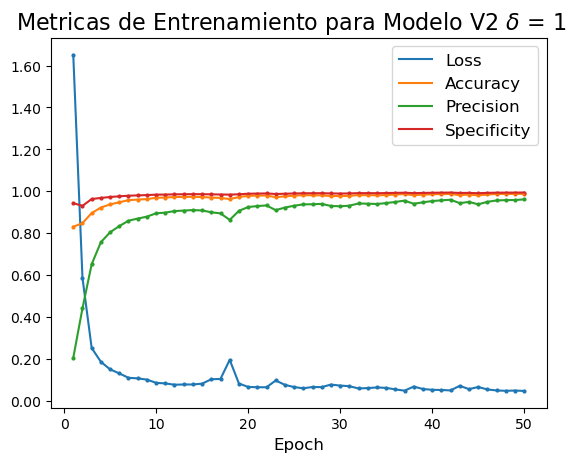

In [3]:
ylabels = ['Loss', 'Accuracy', 'Precision', 'Specificity'] # , 'Accuracy', 'Sensibilidad', 'Precisión', 'F1 Score', 'Especificidad', 'Hamming'
headers = ['loss', 'predicted_final_Accuracy', 'predicted_final_Precision', 'predicted_final_Specificity'] # , 'accuracy', 'recall_m', 'precision_m', 'f1_score_m', 'specificity_m', 'hamming_loss_m'

key = f'historialV2_delta_1'

entrenamiento, ax = plt.subplots(1,1)
entrenamiento.suptitle(fr'Metricas de Entrenamiento para Modelo V2 $\delta$ = 1', y=0.94,fontsize=16)

ax.set_xlabel('Epoch', fontsize=12)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

for k in range(0,4):
    
    y1 = historiales_delta_s2[key][headers[k]]
    y2 = historiales_delta_s5[key][headers[k]]
    y3 = historiales_delta_s7[key][headers[k]]
    y4 = historiales_delta_s11[key][headers[k]]
    y5 = historiales_delta_s42[key][headers[k]]

    Y = [y1, y2, y3, y4, y5]
    y = np.array(list(map(np.mean, zip(*Y))))
    x = np.arange(1, len(y)+1)
    ax.plot(x, y, label=f'{ylabels[k]}')
    ax.scatter(x, y, s=4)

ax.legend(loc='best', fontsize=12)

entrenamiento.savefig(f'../Modelo V2 Reverse/Gráficas Resultados/Media/entrenamientoV2_delta1.png', dpi=300, bbox_inches='tight')  

In [4]:
test = pd.read_excel((datos[0]), sheet_name = 'test', header = 0)
stops = [f'stop.{i}' for i in range(1,401)]
stops2 = [f'stop.{i}' for i in range(0,400)]

Semilla: 2, delta: 1
Semilla: 5, delta: 1
Semilla: 7, delta: 1
Semilla: 11, delta: 1
Semilla: 42, delta: 1
Fin guardado de métricas para las semillas
--------------------------------------
Accuracies: [0.99549997 0.99399996 0.99549997 ... 0.99399996 0.97749996 0.9785    ]
Recalls: [0.9333334 0.9692308 0.9636364 ... 0.9739131 0.9361702 0.9015385]
Especificidades: [0.9959698  0.99667597 0.99943817 ... 0.99661016 0.99019605 0.9934328 ]
Semilla: 2, delta: 2
Semilla: 5, delta: 2
Semilla: 7, delta: 2
Semilla: 11, delta: 2
Semilla: 42, delta: 2
Fin guardado de métricas para las semillas
--------------------------------------
Accuracies: [0.98550004 0.9940001  0.9905001  ... 0.94949996 0.99349993 0.9735001 ]
Recalls: [0.8727273  0.95555556 0.8705883  ... 0.84197533 0.91999996 0.85490197]
Especificidades: [0.9956404  0.99488485 0.9958224  ... 0.9768025  0.9953846  0.9908309 ]
Semilla: 2, delta: 3
Semilla: 5, delta: 3
Semilla: 7, delta: 3
Semilla: 11, delta: 3
Semilla: 42, delta: 3
Fin guardado 

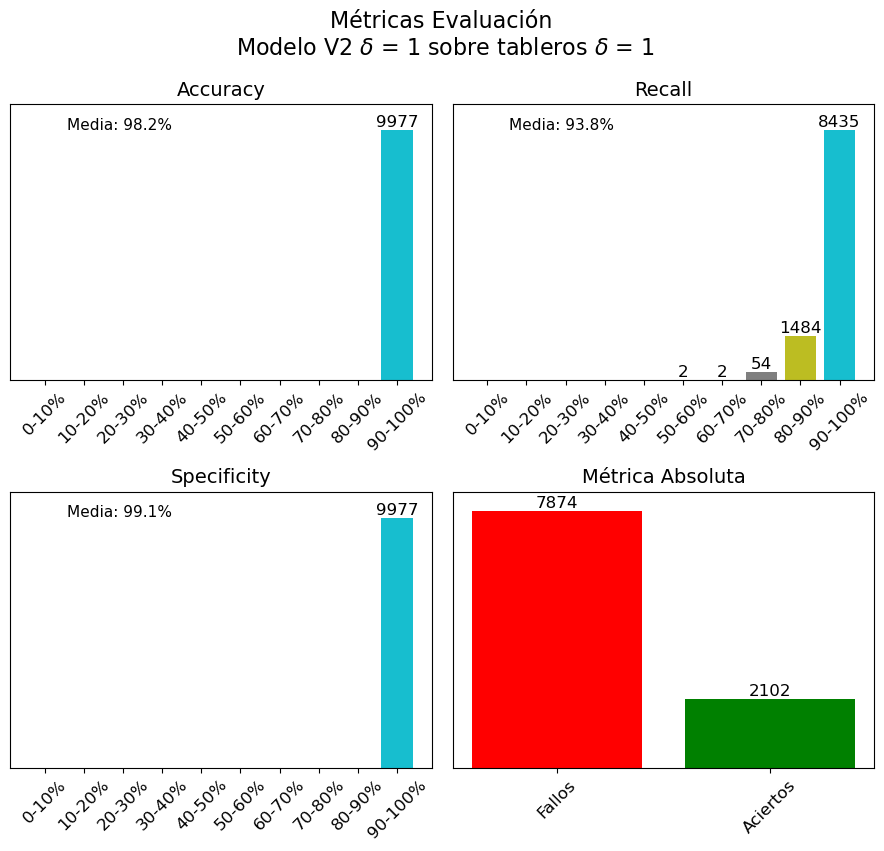

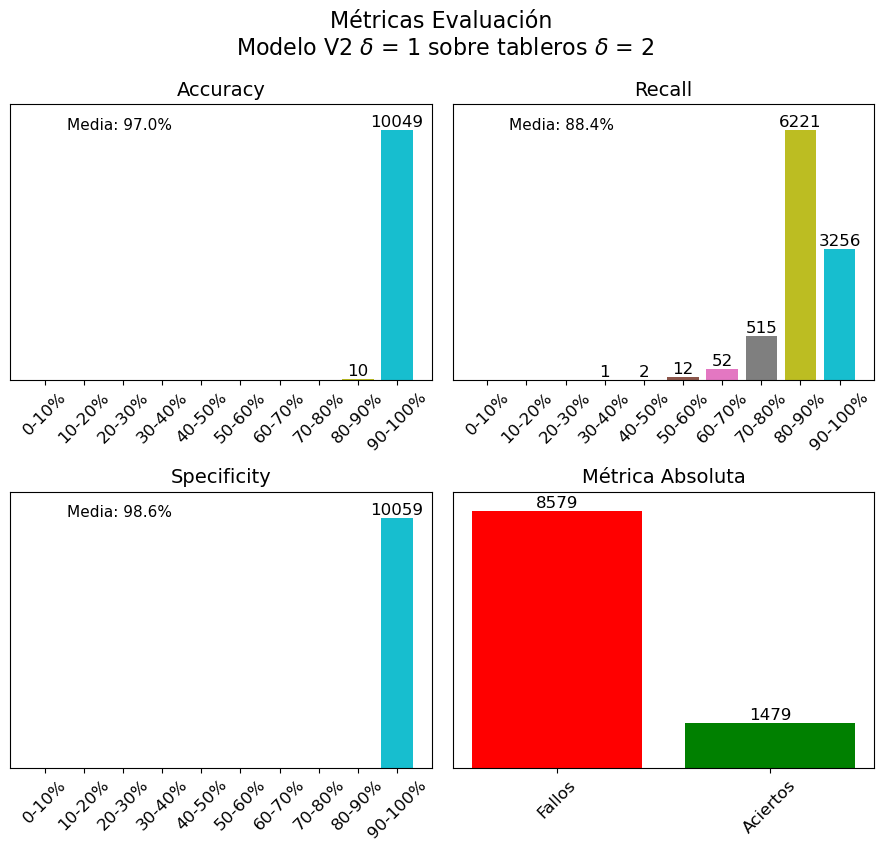

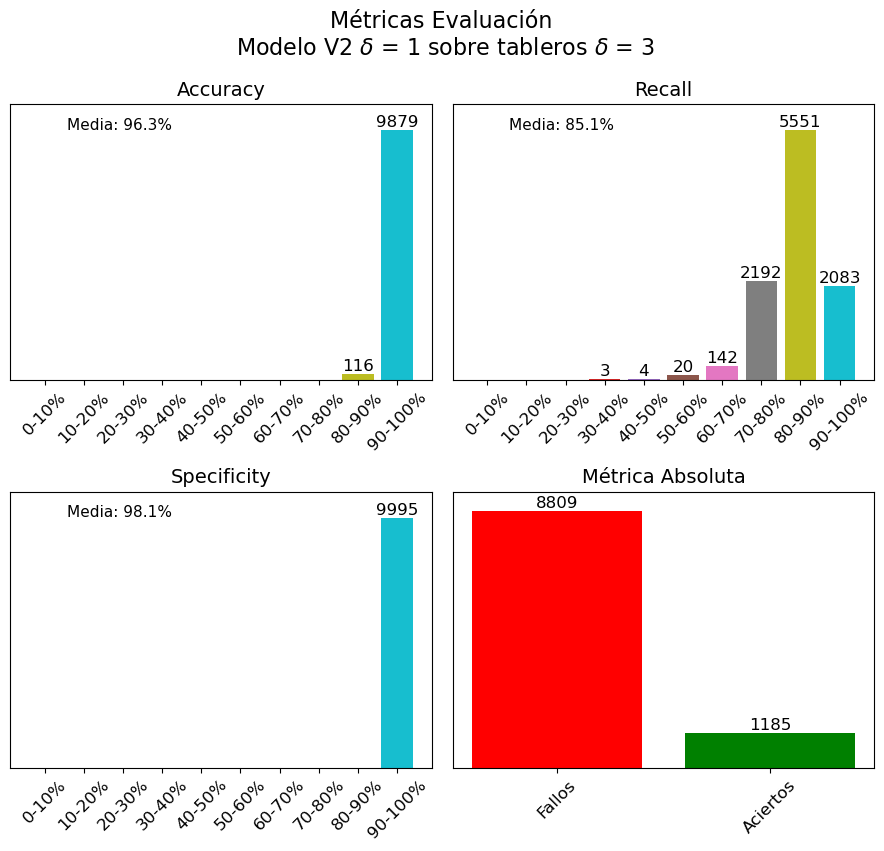

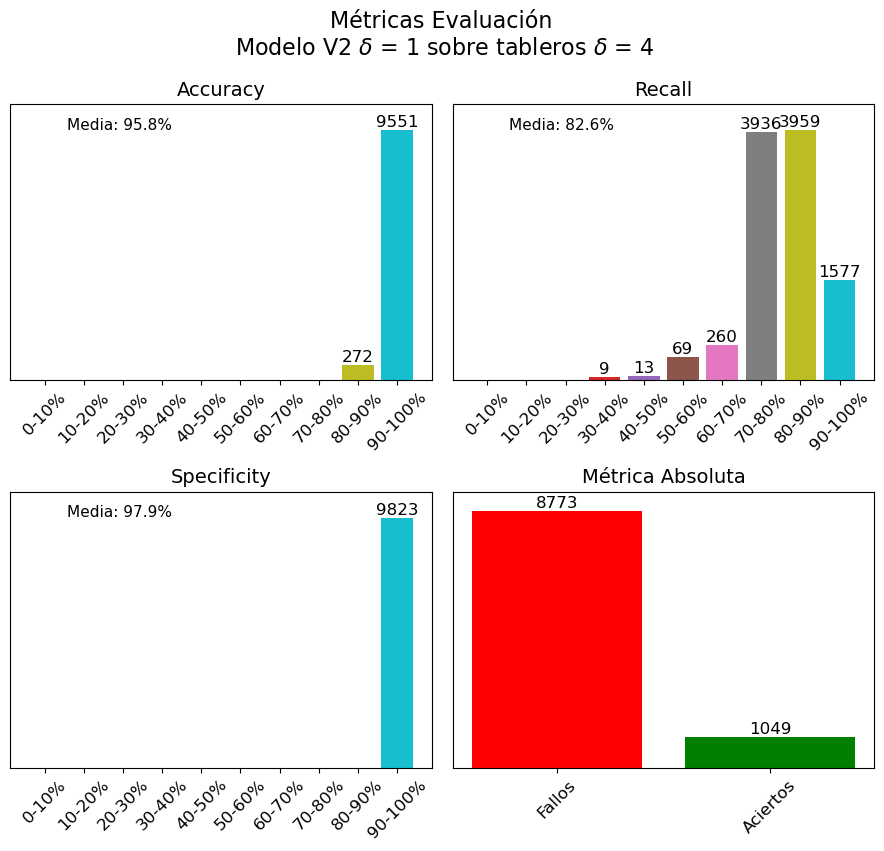

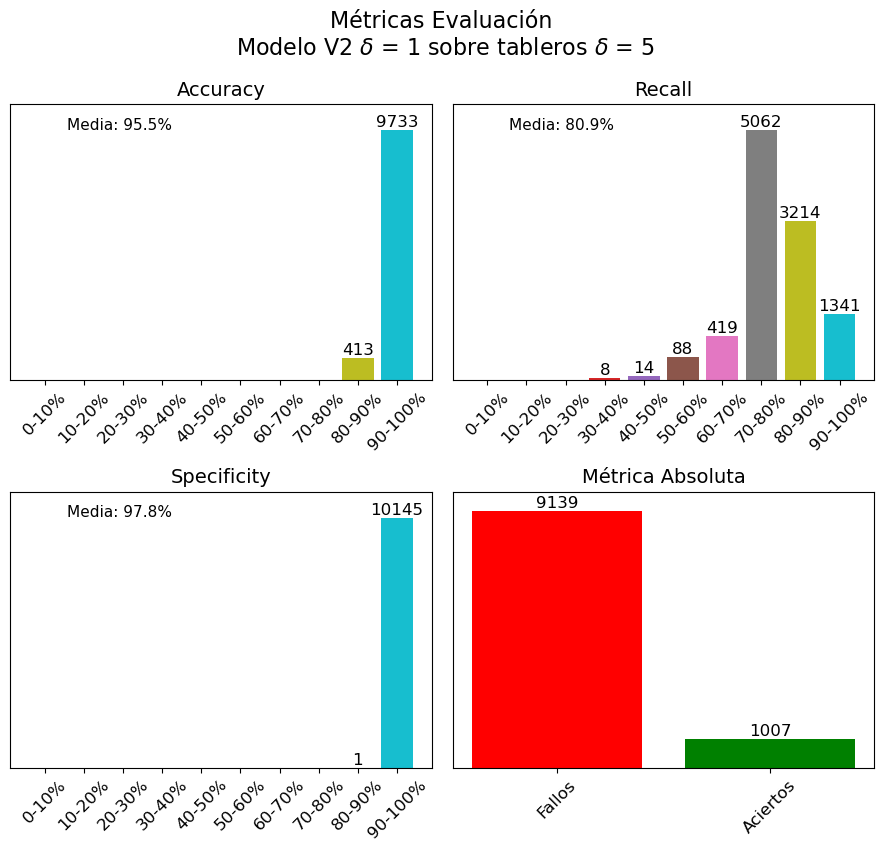

In [5]:
for delta in range(1,6):

    key = f'delta_{delta}'

    Accuracies = []
    Recalls = []
    Especificidades = []
    Fallos = []
    Aciertos = []

    for SEED in seeds:

        print(f'Semilla: {SEED}, delta: {delta}')

        df_predicciones = pd.read_excel(f'../Modelo V2 Reverse/Predicciones/Semilla {SEED}/prediccionesV2.xlsx', sheet_name=key, header=0, usecols=stops2)
        numpy_pred = df_predicciones.to_numpy() # shape (n_tableros, 400)
        tableros_finales_pred = numpy_pred.reshape(-1,20,20) # shape (n_tableros, 20, 20)
        
        delta_i = test[test['delta'] == delta]
        finales_i = np.reshape(delta_i[stops].values, (-1,20,20), order='F')  # shape (n_tableros_finales, 20,20)
        
        ### Métricas ###
        accuracies = []
        recalles = []
        especificidades = []
        absolutos = []

        for tablero_final_pred, final_real in zip(tableros_finales_pred, finales_i):  # (20x20), (20x20)

            # Hay que usar ravel porque los comandos de las métricas esperan valores, no arrays
            y_pred = tablero_final_pred.astype(int).ravel()  # (20x20) => (400,)
            y_true = final_real.astype(int).ravel()  # (20x20) => (400,)

            # Convertir a tensores float32
            y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
            y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
            
            # Calcular métricas
            accuracies.append(Accuracy(y_true, y_pred).numpy())
            recalles.append(Recall(y_true, y_pred).numpy())
            especificidades.append(Specificity(y_true, y_pred).numpy())
            absolutos.append(np.array_equal(y_pred, y_true))
        
        # Conteo fallos y aciertos
    
        fallos = absolutos.count(0)
        aciertos = absolutos.count(1)

        # Guardado de métricas
        Accuracies.append(accuracies)
        Recalls.append(recalles)
        Especificidades.append(especificidades)
        Fallos.append(fallos)
        Aciertos.append(aciertos)

        
    print('Fin guardado de métricas para las semillas')
    print('--------------------------------------')
    ### Gráficas puntos ###
    
    id = np.arange(0, len(tableros_finales_pred)) # id de los tableros
    y1 = np.array(list(map(np.mean, zip(*Accuracies))))
    y2 = np.array(list(map(np.mean, zip(*Recalls))))
    y3 = np.array(list(map(np.mean, zip(*Especificidades))))
    y4_1 = int(np.mean(Fallos))
    y4_2 = int(np.mean(Aciertos))

    print(f'Accuracies: {y1}')
    print(f'Recalls: {y2}')
    print(f'Especificidades: {y3}')

    
    lista = [y1,y2,y3, '']
    metricas = ['Accuracy','Recall',  'Specificity', 'Absoluto']

    xlab = ['Fallos', 'Aciertos']
    barras_conteo = [y4_1, y4_2]
    color_conteo = ['red', 'green']

    # --------------------- GRÁFICO BARRAS ---------------------

    fig, ax = plt.subplots(2, 2, figsize=(9,9))
    ax = ax.flatten()

    x = ['0-10%', '10-20%', '20-30%', '30-40%','40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

    for k in range(len(metricas)):

        
        contados_x_intervalos = []

        if k != len(metricas) - 1:
            ax[k].hlines(np.mean(lista[k])*100, 0,0)
            custom_legend = [Line2D([], [], linestyle='None', marker='', label=f'Media: {np.round(np.mean(lista[k])*100,1)}%')]
            # Agregar la leyenda solo con texto
            ax[k].legend(handles=custom_legend, loc='best', frameon=False, fontsize=11)

            for i in np.arange(0, 1, 0.1):
                x1 = i
                x2 = i + 0.1
                if i == 0.0:
                    contados_x_intervalos.append(np.sum((lista[k] >= x1) & (lista[k] <= x2)))
                else:
                    contados_x_intervalos.append(np.sum((lista[k] > x1) & (lista[k] <= x2)))

            
                    ### Gráficos de Barras ###

            colores = ['#1f77b4',  # azul
                        '#ff7f0e',  # naranja
                        '#2ca02c',  # verde
                        '#d62728',  # rojo
                        '#9467bd',  # morado
                        '#8c564b',  # marrón
                        '#e377c2',  # rosa
                        '#7f7f7f',  # gris
                        '#bcbd22',  # verde amarillento
                        '#17becf']  # azul verdoso
            
            
            for j in range(0, len(contados_x_intervalos)):
                
                real = contados_x_intervalos[j]
                
                y = real/len(id)
                
                if real< 1000:
                    if real == 0:

                        ax[k].bar(x[j], y, color='black')

                    elif real < 100:

                        ax[k].bar(x[j], y*5,color = colores[j])
                        ax[k].annotate(f'{int(contados_x_intervalos[j])}', xy=(x[j], y*5), ha='center', va='bottom', fontsize=12, color='black')
                        
                        
                    else:
                        ax[k].bar(x[j], y*2,color = colores[j])
                        ax[k].annotate(f'{int(contados_x_intervalos[j])}', xy=(x[j], y*2), ha='center', va='bottom', fontsize=12, color='black')
                        
                else:
                    
                    ax[k].bar(x[j],y*0.95, color = colores[j])
                    ax[k].annotate(f'{int(contados_x_intervalos[j])}', xy=(x[j], y*0.95), ha='center', va='bottom', fontsize=12, color='black')
                    

            ax[k].set_yticks([])
            ax[k].set_ylim(0, (max(contados_x_intervalos))/len(id)*1.05)
            ax[k].set_title(f'{metricas[k]}', fontsize=14)
            ax[k].tick_params(axis='x', rotation=45, labelsize=12) 

        else:
            for i in range(2):
                ax[k].bar(x = xlab[i], height = barras_conteo[i], color= color_conteo[i])
                ax[k].annotate(f'{barras_conteo[i]}', xy=(xlab[i], barras_conteo[i]), ha='center', va='bottom', fontsize=12, color='black')
                ax[k].tick_params(axis='x', rotation=45, labelsize=12)  
            ax[k].set_title('Métrica Absoluta', fontsize=14)
            ax[k].set_yticks([])
            ax[k].set_ylim(0, max(barras_conteo)*1.075)

    fig.suptitle('Métricas Evaluación \n' fr'Modelo V2 $\delta$ = 1 sobre tableros $\delta$ = {delta}', y = 0.94, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    fig.savefig(f'../Modelo V2 Reverse/Gráficas Resultados/Media/barrasV2_delta{delta}.png', dpi=300, bbox_inches='tight')
    print(f'Fin delta = {delta}')
    print('--------------------------------------')
    
plt.show()